# MNIST hand written digit reading with a dense neural network

### Author: João Valeriano, Instituto de Física, Universidade de Brasília


In [2]:
pip install tensorflow numpy mnist

In [3]:
# Import needed packages
import numpy as np
import mnist
from tensorflow import keras

In [4]:
# Get MNIST images
train_images = mnist.train_images()
train_labels = mnist.train_labels()
test_images = mnist.test_images()
test_labels = mnist.test_labels()

print(train_images.shape)
print(train_labels.shape)
print(test_images.shape)
print(test_labels.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [5]:
# Normalizing images
train_images = (train_images / 255) - 0.5
test_images = (test_images / 255) - 0.5

# Flattening images
train_images = train_images.reshape((-1, 784))
test_images = test_images.reshape((-1, 784))

print(train_images.shape)
print(test_images.shape)

(60000, 784)
(10000, 784)


In [6]:
from tensorflow.keras.models import Sequential # Model of sequential layers
from tensorflow.keras.layers import Dense

# Model definition
model = Sequential([
                    Dense(64, activation="relu", input_shape=(784,)),
                    Dense(64, activation="relu"),
                    Dense(10, activation="softmax"),
])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                50240     
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_2 (Dense)              (None, 10)                650       
Total params: 55,050
Trainable params: 55,050
Non-trainable params: 0
_________________________________________________________________


In [7]:
# Model compilation
model.compile(
    optimizer = "adam",
    loss = "categorical_crossentropy",
    metrics = ["accuracy"],
)

In [8]:
from tensorflow.keras.utils import to_categorical

# Model fitting
model.fit(
    train_images,
    to_categorical(train_labels),
    epochs = 10,
    batch_size = 32
)

Epoch 1/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3618 - accuracy: 0.8910
Epoch 2/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.1918 - accuracy: 0.9414
Epoch 3/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.1472 - accuracy: 0.9538
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1222 - accuracy: 0.9617
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1041 - accuracy: 0.9663
Epoch 6/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0961 - accuracy: 0.9690
Epoch 7/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0849 - accuracy: 0.9726
Epoch 8/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0797 - accuracy: 0.9746
Epoch 9/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0709 - accuracy: 0.9768
Epoch 10/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.069

In [9]:
# Model testing
model.evaluate(
    test_images,
    to_categorical(test_labels)
)

313/313 [==============================] - 0s 944us/step - loss: 0.0880 - accuracy: 0.9733


[0.08803325891494751, 0.9732999801635742]

First 5 Predictions: [7 2 1 0 4]
Actual images:


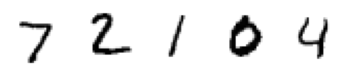

In [10]:
import matplotlib.pyplot as plt

predictions = model.predict(test_images[:5])
print("First 5 Predictions:", np.argmax(predictions, axis=1))
print("Actual images:")
for i in range(5):
    plt.subplot(1,5,i+1)
    plt.axis("off")
    plt.imshow(test_images[i].reshape((28,28)), cmap="binary")

In [11]:
# Confusion matrix
def confusion_matrix(pred, label):

    n = np.max(pred)+1
    cm = np.zeros((n,n))

    for i in range(n):

        real = np.where(label == i)[0]

        for j in range(n):
            
            cm[i,j] = len(np.where(pred[real] == j)[0])

    cm /= np.sum(cm)

    return cm

Correct predictions for Train data: 98.41%
Correct predictions for Test data: 97.33%


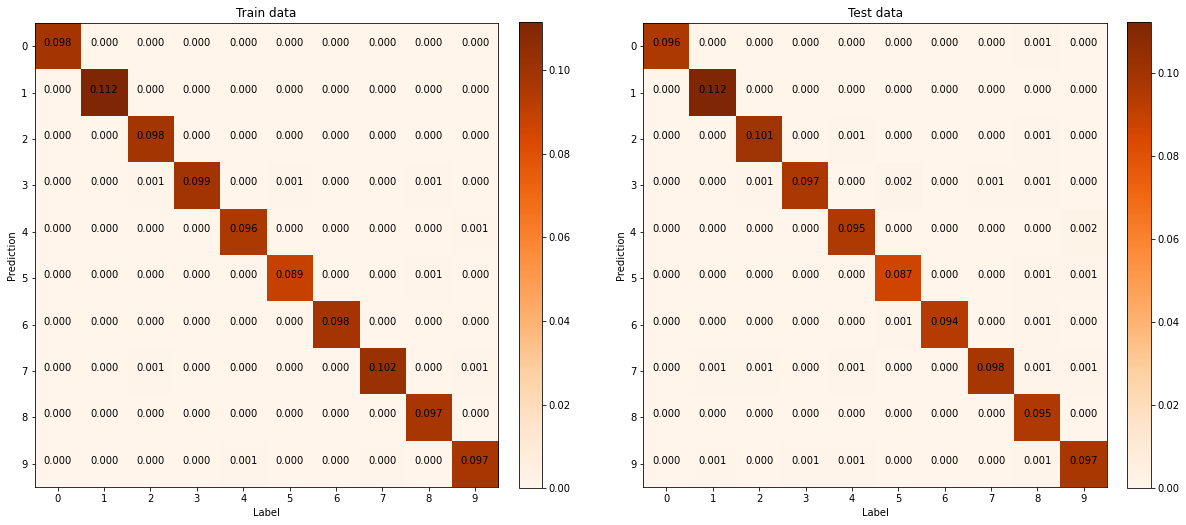

In [12]:
data_label = [[train_images, train_labels, "Train"], [test_images, test_labels, "Test"]]

import matplotlib.pyplot as plt

# Plot confusion matrix for train and test images
plt.figure(figsize=(20, 10))
for k in range(2):
    plt.subplot(1,2,k+1)
    pred = np.argmax(model.predict(data_label[k][0]), axis=1)

    cm = confusion_matrix(pred, data_label[k][1])
    print(r"Correct predictions for %s data: %.2f%%" % (data_label[k][2], np.trace(cm)*100))

    plt.imshow(cm, cmap="Oranges")
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            plt.text(j, i, "%.3f"%cm[i,j], ha="center")
    plt.xticks(np.unique(pred))
    plt.yticks(np.unique(data_label[k][1]))
    plt.xlabel("Label")
    plt.ylabel("Prediction")
    plt.gca().set_title("%s data" % (data_label[k][2]))
    plt.colorbar(fraction=0.046, pad=0.04)
plt.show()

In [13]:
# Let's add dropout

from tensorflow.keras.layers import Dropout

# Model definition
model = Sequential([
                    Dense(64, activation="relu", input_shape=(784,)),
                    Dropout(0.2),
                    Dense(64, activation="relu"),
                    Dropout(0.1),
                    Dense(10, activation="softmax"),
])

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 64)                50240     
_________________________________________________________________
dropout (Dropout)            (None, 64)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 64)                4160      
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_5 (Dense)              (None, 10)                650       
Total params: 55,050
Trainable params: 55,050
Non-trainable params: 0
_________________________________________________________________


In [14]:
# Model compilation
model.compile(
    optimizer = "adam",
    loss = "categorical_crossentropy",
    metrics = ["accuracy"],
)

In [15]:
# Model fitting
model.fit(
    train_images,
    to_categorical(train_labels),
    epochs = 10,
    batch_size = 32
)

Epoch 1/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5266 - accuracy: 0.8332
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3196 - accuracy: 0.9010
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2720 - accuracy: 0.9156
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2483 - accuracy: 0.9223
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2323 - accuracy: 0.9266
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2207 - accuracy: 0.9306
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2135 - accuracy: 0.9326
Epoch 8/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2010 - accuracy: 0.9372
Epoch 9/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1933 - accuracy: 0.9403
Epoch 10/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.194

In [16]:
# Model testing
model.evaluate(
    test_images,
    to_categorical(test_labels)
)

313/313 [==============================] - 0s 925us/step - loss: 0.1284 - accuracy: 0.9601


[0.12840591371059418, 0.960099995136261]

Correct predictions for Train data: 96.80%
Correct predictions for Test data: 96.01%


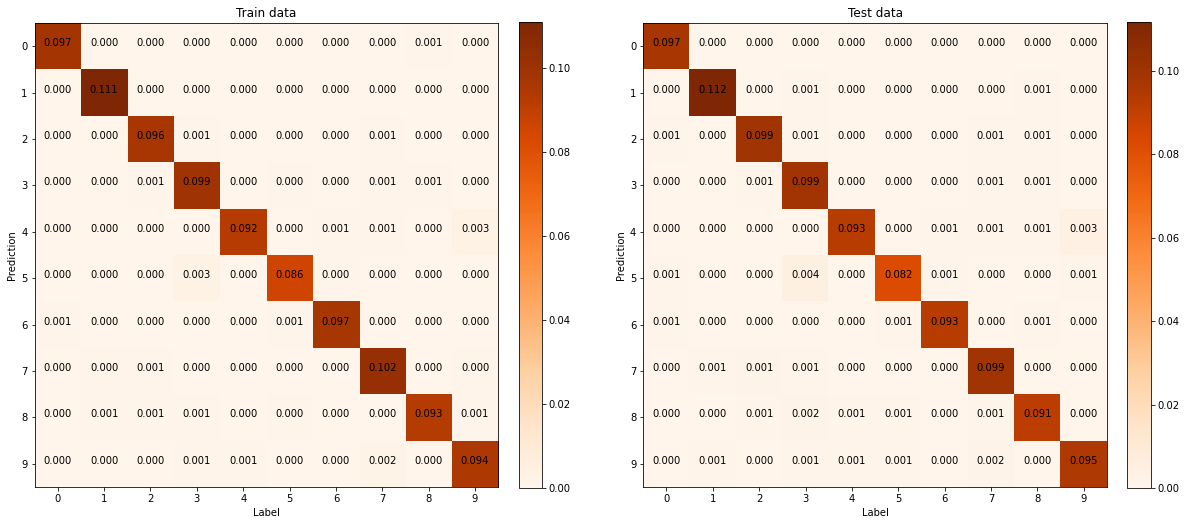

In [17]:
data_label = [[train_images, train_labels, "Train"], [test_images, test_labels, "Test"]]

import matplotlib.pyplot as plt

# Plot confusion matrix for train and test images
plt.figure(figsize=(20, 10))
for k in range(2):
    plt.subplot(1,2,k+1)
    pred = np.argmax(model.predict(data_label[k][0]), axis=1)

    cm = confusion_matrix(pred, data_label[k][1])
    print(r"Correct predictions for %s data: %.2f%%" % (data_label[k][2], np.trace(cm)*100))

    plt.imshow(cm, cmap="Oranges")
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            plt.text(j, i, "%.3f"%cm[i,j], ha="center")
    plt.xticks(np.unique(pred))
    plt.yticks(np.unique(data_label[k][1]))
    plt.xlabel("Label")
    plt.ylabel("Prediction")
    plt.gca().set_title("%s data" % (data_label[k][2]))
    plt.colorbar(fraction=0.046, pad=0.04)